In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import gaussian_kde

import riskDualObserverShared as model
import tools as tools

In [2]:
import riskDualObserverShared as model
import tools as tools

2.0


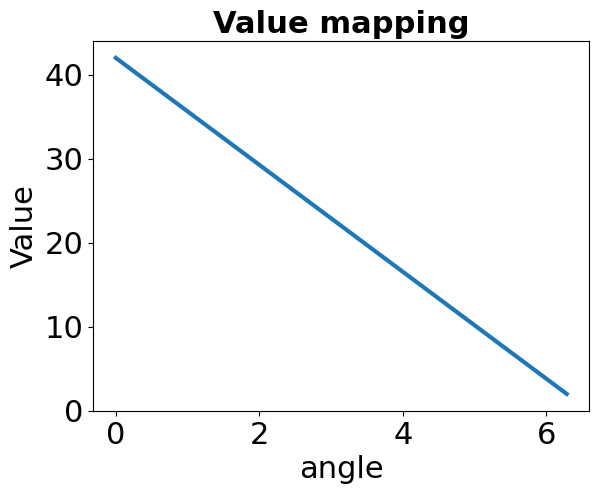

In [3]:
type = "linearDecrease"
line_frac = 0.0

plt.plot(tools.stim_ori_grid, tools.value_function_ori(tools.stim_ori_grid, type, line_frac))
# plt.plot(tools.stim_ori_grid, tools.value_function_ori(tools.stim_ori_grid, "cdf_prior", line_frac))
# plt.plot(tools.stim_ori_grid,(integrate.cumtrapz(tools.prior_ori(tools.stim_ori_grid), tools.stim_ori_grid, initial=0.0))*tools.factor_val+tools.min_val)

print(min(tools.value_function_ori(tools.stim_ori_grid, type, line_frac)))

plt.ylabel("Value")
plt.xlabel("angle")
plt.title("Value mapping", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

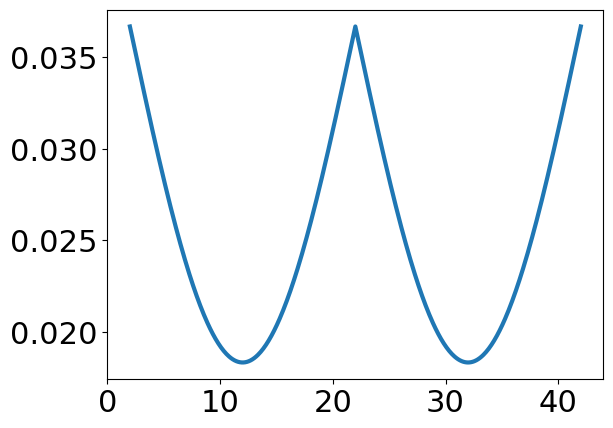

In [4]:
plt.plot(model.prior_val("linearIncrease")[0], model.prior_val("linearIncrease")[1])
# model.prior_val("inversePrior")[0]

(1, 501)

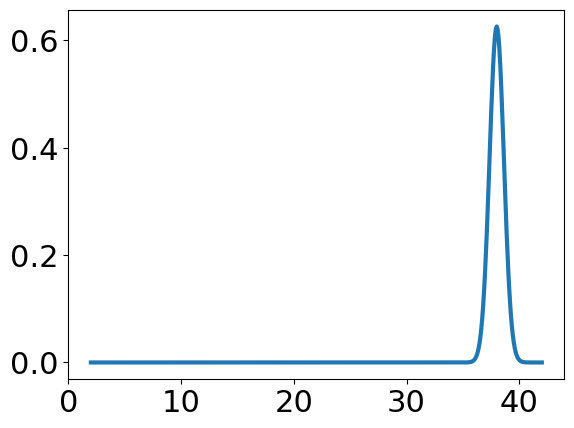

In [13]:

theta0 = 0.2*np.pi
kappa_s = 100
type = "linearDecrease"

bin_centers, ps = tools.ori_to_val_dist(model.stim_ori_grid, model.stimulus_ori_noise(theta0, kappa_s, model.stim_ori_grid), type, monotonic=True)


plt.plot(bin_centers, ps[0])

np.shape(bin_centers)
np.shape(ps)



In [32]:
theta0 = 10/90*np.pi*np.pi
kappa_s = 1000
kappa_r = 32
type = "linearDecrease"

rep_val_grid, p_mVal_given_Val0, p_mVal_given_Val = model.val_encoded(theta0, kappa_s, kappa_r, type)

p_mVal_given_Val[0] = tools.value_function_ori(p_mVal_given_Val[0], type)

# rep_val_grid, stim_val_grid, p_value_est_given_val0 = model.value_bayesian_decoding(theta0, kappa_s, kappa_r, type)

# p_mOri_given_theta0, p_mOri_given_theta = model.MI_orientation_encoding(theta0, kappa_s, kappa_r)

# plt.plot(rep_val_grid, p_mVal_given_Val0[0])

# plt.plot(stim_val_grid, p_value_est_given_val0[0])

# plt.plot(p_mOri_given_theta0[0])


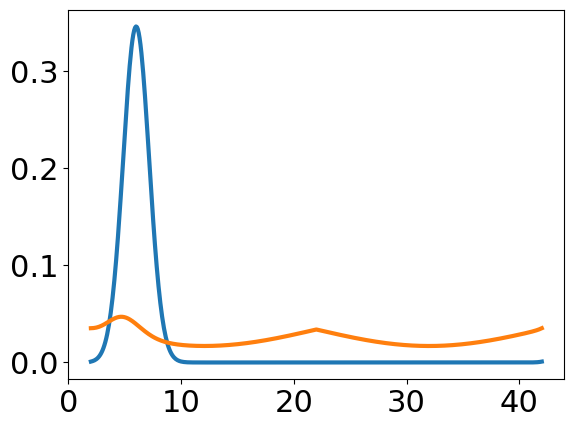

In [39]:
theta0 = 14/90*np.pi
kappa_s = 1000
kappa_r = 32
type = "linearIncrease"

rep_val_grid, p_mVal_given_Val0, p_mVal_given_Val = model.val_encoded(theta0, kappa_s, kappa_r, type)
p_mVal_given_Val[:,...] = tools.value_function_ori(p_mVal_given_Val[:,...], type)
plt.plot(rep_val_grid, p_mVal_given_Val0[0])

p_val_given_mVal = p_mVal_given_Val*np.array(model.prior_val(type)[1])[:, np.newaxis]
# plt.plot(rep_val_grid, p_val_given_mVal[60])

# print(tools.ori_to_val_dist(tools.stim_ori_grid, tools.prior_ori, type)[2])

stim_val_grid = model.prior_val(type)[0]

p_val_given_mVal = p_val_given_mVal / abs(trapezoid(p_val_given_mVal, stim_val_grid, axis=0)[np.newaxis,:])
# plt.plot(rep_val_grid, p_val_given_mVal[60])

p_value_est_given_val0 = p_mVal_given_Val0[:, np.newaxis, :] * p_val_given_mVal[np.newaxis, ...]
# Get rid of m
p_value_est_given_val0 = abs(trapezoid(p_value_est_given_val0, rep_val_grid, axis=2))
p_value_est_given_val0 /= abs(trapezoid(p_value_est_given_val0, stim_val_grid, axis=1)[:, np.newaxis])
plt.plot(stim_val_grid, p_value_est_given_val0[0])



70.0
96.47999999999999
[ 2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2
  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8 11.2 11.6 12.  12.4 12.8
 13.2 13.6 14.  14.4 14.8 15.2 15.6 16.  16.4 16.8 17.2 17.6 18.  18.4
 18.8 19.2 19.6 20.  20.4 20.8 21.2 21.6 22.  22.4 22.8 23.2 23.6 24.
 24.4 24.8 25.2 25.6 26.  26.4 26.8 27.2 27.6 28.  28.4 28.8 29.2 29.6
 30.  30.4 30.8 31.2 31.6 32.  32.4 32.8 33.2 33.6 34.  34.4 34.8 35.2
 35.6 36.  36.4 36.8 37.2 37.6 38.  38.4 38.8 39.2 39.6 40.  40.4 40.8
 41.2 41.6 42. ]
[ 2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2
  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8 11.2 11.6 12.  12.4 12.8
 13.2 13.6 14.  14.4 14.8 15.2 15.6 16.  16.4 16.8 17.2 17.6 18.  18.4
 18.8 19.2 19.6 20.  20.4 20.8 21.2 21.6 22.  22.4 22.8 23.2 23.6 24.
 24.4 24.8 25.2 25.6 26.  26.4 26.8 27.2 27.6 28.  28.4 28.8 29.2 29.6
 30.  30.4 30.8 31.2 31.6 32.  32.4 32.8 33.2 33.6 34.  34.4 34.8 35.2
 35.6 36.  36.4 36.8 37.2 37.6 38.  38.

array([[0.51874068]])

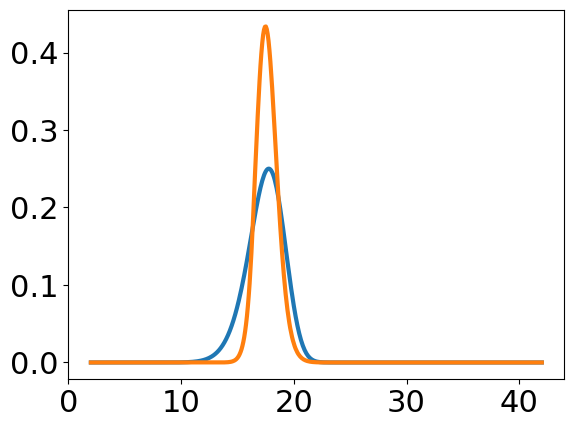

In [10]:
theta0 = 70./90.*np.pi
kappa_s = 10000
kappa_r = 32
type = "linearDecrease"
risk_prob = 0.75
theta1 = float(tools.inverse_monotonic(tools.value_function_ori(theta0, type)/risk_prob, type)) 

print(theta0*90/np.pi)
print(theta1*90/np.pi)

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type)
risky_value, risky_prob = model.risky_value_dist(theta1, kappa_s, kappa_r, risk_prob, type)

plt.plot(safe_value, safe_prob[0])
plt.plot(safe_value, risky_prob[0])

p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
p_chose_risky

# tools.get_rnp(safe_value, risky_value)
# plt.plot(rep_val_grid, p_mVal_given_Val0[0])
# plt.plot(stim_val_grid, p_val_given_mVal[40])
# plt.plot(stim_val_grid, abs(trapezoid((p_mVal_given_Val0[:,np.newaxis,:]*p_val_given_mVal[np.newaxis, ...]),rep_val_grid,axis = 2)[0]))
# plt.plot(stim_val_grid, p_value_est_given_val0[0])

# Uncovering risk attitudes

# Comaparing two models - Both safe and risky option with same noise type

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import gaussian_kde

import riskDualObserverShared as model
import tools as tools

In [4]:
def rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            print("y")
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        print("safe_a - ", safe_angles[i]*90/np.pi)
        print("range - ", rangeOri*90/np.pi)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)

        # plt.plot(safe_value, safe_prob[0])
        # plt.plot(safe_value, risky_prob[0])
        # plt.plot(safe_value, risky_prob[-1])
        # plt.show()

        # print("safeval", safeVal)
        # print("val_ra", val_range)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



y
safe_a -  179.0
range -  [179.         178.73473684 178.46947368 178.20421053 177.93894737
 177.67368421 177.40842105 177.14315789 176.87789474 176.61263158
 176.34736842 176.08210526 175.81684211 175.55157895 175.28631579
 175.02105263 174.75578947 174.49052632 174.22526316 173.96      ]
[ 2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2
  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8 11.2 11.6 12.  12.4 12.8
 13.2 13.6 14.  14.4 14.8 15.2 15.6 16.  16.4 16.8 17.2 17.6 18.  18.4
 18.8 19.2 19.6 20.  20.4 20.8 21.2 21.6 22.  22.4 22.8 23.2 23.6 24.
 24.4 24.8 25.2 25.6 26.  26.4 26.8 27.2 27.6 28.  28.4 28.8 29.2 29.6
 30.  30.4 30.8 31.2 31.6 32.  32.4 32.8 33.2 33.6 34.  34.4 34.8 35.2
 35.6 36.  36.4 36.8 37.2 37.6 38.  38.4 38.8 39.2 39.6 40.  40.4 40.8
 41.2 41.6 42. ]
[ 2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2
  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8 11.2 11.6 12.  12.4 12.8
 13.2 13.6 14.  14.4 14.8 15.2 15.6 16.  16.4 16.8 17

KeyboardInterrupt: 

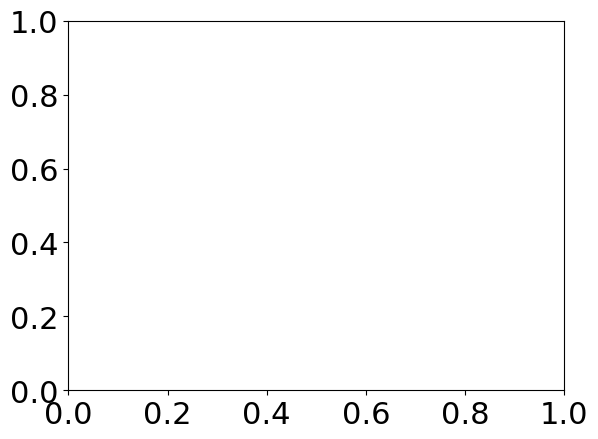

In [5]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "linearDecrease" 

# changeable parameters
stim_list = [10000]
rep_list = [64, 32, 16, 8, 4]#[0.2, 0.14, 0.1, 0.07, 0.05, 0.035]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for stim_noise in stim_list:
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp = rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects)
        ax1.set_ylim(0.6, 0.9)
        ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

        text = "stim (k): "+ str(stim_noise)+"; rep ($\sigma$): "+str(rep_noise)
        ax1.plot(safe_angles[:]*90./np.pi, rnp[:], label = text)


        ax2 = ax1.twiny()
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            ax2.set_xlim(max(safeVals), min(safe_angles))

        ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

ax1.axhline(risk_prob, c='k', ls='--')
ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

ax2.set_xlabel("Safe value")
ax1.set_xlabel("Safe angles")
ax1.set_ylabel("RNP")
ax1.set_title("Exp range - " + tools.experimentRange + "\n Shared model : " + type) 


plt.savefig('/Users/sbedi/Downloads/sharefig.png',dpi=300, bbox_inches = "tight")